In [1]:
# Download data
# import download_data

In [2]:
# Load in data
import numpy as np
train_X = np.load("kmnist-train-imgs.npz")['arr_0']
train_y = np.load("kmnist-train-labels.npz")['arr_0']
test_X = np.load("kmnist-test-imgs.npz")['arr_0']
test_y = np.load("kmnist-test-labels.npz")['arr_0']

In [3]:
# Check shape of data
np.shape(train_X), np.shape(train_y), np.shape(test_X), np.shape(test_y)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

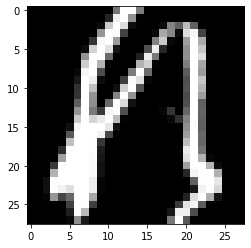

In [4]:
# View 1 of the characters
from matplotlib import pyplot as plt
img1 = train_X[0]
plt.imshow(img1, cmap = plt.get_cmap('gray'))

In [5]:
# Normalize pixel values
train_X = train_X / 255.0
test_X = test_X / 255.0

In [6]:
# Reshape Datasets
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

In [7]:
# Import neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
from tensorflow.keras.layers import BatchNormalization

In [11]:
from tensorflow.keras import regularizers

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
 optimizer='adam',
 metrics=['accuracy'])
model.fit(train_X, train_y, batch_size = 32, epochs = 3, validation_split = 0.1)

model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/3
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3562 - accuracy: 0.8919 - val_loss: 0.1829 - val_accuracy: 0.9447
Epoch 2/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1532 - accuracy: 0.9540 - val_loss: 0.1441 - val_accuracy: 0.9575
Epoch 3/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1127 - accuracy: 0.9666 - val_loss: 0.1079 - val_accuracy: 0.9665


0.9075000286102295

In [29]:
# M6-2 model

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

BATCH_SIZE = 16
EPOCHS = 50
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history = []
for i in range(EPOCHS):
    history.append(model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))



# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)[1]

3375/3375 [==============================] - 70s 21ms/step - loss: 0.2625 - accuracy: 0.9184 - val_loss: 0.1704 - val_accuracy: 0.9468
Test set loss: 0.41284793615341187, test set accuracy: 0.8866999745368958
3375/3375 [==============================] - 69s 20ms/step - loss: 0.1130 - accuracy: 0.9645 - val_loss: 0.0991 - val_accuracy: 0.9717
Test set loss: 0.3188423216342926, test set accuracy: 0.917900025844574
3375/3375 [==============================] - 75s 22ms/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.1249 - val_accuracy: 0.9638
Test set loss: 0.3354545533657074, test set accuracy: 0.9161999821662903
3375/3375 [==============================] - 75s 22ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.1071 - val_accuracy: 0.9707
Test set loss: 0.2871098816394806, test set accuracy: 0.9327999949455261
3375/3375 [==============================] - 75s 22ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0891 - val_accuracy: 0.9765
Test set loss: 0.2563764750957489

KeyboardInterrupt: 

In [18]:
print(history.history)

{'loss': [0.26608556509017944, 0.11495079845190048, 0.07657629251480103, 0.05488773062825203, 0.04548388347029686, 0.03608114644885063, 0.02741876058280468, 0.026133619248867035, 0.024337681010365486, 0.021681630983948708], 'accuracy': [0.915314793586731, 0.9638518691062927, 0.9756666421890259, 0.983129620552063, 0.9858888983726501, 0.988703727722168, 0.9913148283958435, 0.9918518662452698, 0.9927592873573303, 0.993759274482727], 'val_loss': [0.1634930968284607, 0.2114003300666809, 0.10772743076086044, 0.11796694993972778, 0.08761326223611832, 0.09510474652051926, 0.13622955977916718, 0.09605921059846878, 0.09540624916553497, 0.0995713621377945], 'val_accuracy': [0.9503333568572998, 0.9401666522026062, 0.9714999794960022, 0.9678333401679993, 0.9791666865348816, 0.9786666631698608, 0.9726666808128357, 0.981166660785675, 0.9816666841506958, 0.9808333516120911]}


In [20]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history2 = model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/10
3375/3375 [==============================] - 73s 21ms/step - loss: 0.5817 - accuracy: 0.9061 - val_loss: 0.5669 - val_accuracy: 0.9177
Epoch 2/10
3375/3375 [==============================] - 76s 22ms/step - loss: 0.4479 - accuracy: 0.9444 - val_loss: 0.4946 - val_accuracy: 0.9232
Epoch 3/10
3375/3375 [==============================] - 77s 23ms/step - loss: 0.3887 - accuracy: 0.9535 - val_loss: 0.4208 - val_accuracy: 0.9480
Epoch 4/10
3375/3375 [==============================] - 74s 22ms/step - loss: 0.3372 - accuracy: 0.9605 - val_loss: 0.3489 - val_accuracy: 0.9552
Epoch 5/10
3375/3375 [==============================] - 75s 22ms/step - loss: 0.3071 - accuracy: 0.9642 - val_loss: 0.3676 - val_accuracy: 0.9505
Epoch 6/10
3375/3375 [==============================] - 73s 22ms/step - loss: 0.2839 - accuracy: 0.9668 - val_loss: 0.3225 - val_accuracy: 0.9568
Epoch 7/10
3375/3375 [==============================] - 74s 22ms/step - loss: 0.2626 - accuracy: 0.9683 - val_loss: 0.2721 -

0.920799970626831

In [26]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_25 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_26 (Bat  (None, 11, 11, 128)     

In [34]:
# regularizer in conv layers

model = Sequential()

lmbd = 0

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history3 = []

for i in range(EPOCHS):
    print("Epoch " + str(i + 1))
    history3.append(model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1
3375/3375 [==============================] - 367s 109ms/step - loss: 0.2313 - accuracy: 0.9305 - val_loss: 0.0773 - val_accuracy: 0.9747
Test set loss: 0.2012374848127365, test set accuracy: 0.944100022315979
Epoch 2
3375/3375 [==============================] - 364s 108ms/step - loss: 0.0873 - accuracy: 0.9739 - val_loss: 0.0578 - val_accuracy: 0.9827
Test set loss: 0.16544103622436523, test set accuracy: 0.9574000239372253
Epoch 3
3375/3375 [==============================] - 367s 109ms/step - loss: 0.0624 - accuracy: 0.9816 - val_loss: 0.0591 - val_accuracy: 0.9833
Test set loss: 0.16524016857147217, test set accuracy: 0.954800009727478
Epoch 4
3375/3375 [==============================] - 360s 107ms/step - loss: 0.0494 - accuracy: 0.9860 - val_loss: 0.0410 - val_accuracy: 0.9903
Test set loss: 0.1597684621810913, test set accuracy: 0.9614999890327454
Epoch 5
3375/3375 [==============================] - 374s 111ms/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0508 - val_

In [35]:
# regularizer in conv layers

model = Sequential()

lmbd = 0

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_75 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 activation_111 (Activation)  (None, 26, 26, 64)       0         
                                                                 
 conv2d_76 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_76 (Bat  (None, 24, 24, 128)      512       
 chNormalization)                                                
                                                                 
 activation_112 (Activation)  (None, 24, 24, 128)    

l2 regularizer, lambda = 10^-6. this exhibits the highest test accuracy after 10 epochs, though not by much.

this is the current best code
2C -> M -> 2C -> M -> C -> M -> output

In [18]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.000001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history4 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history4.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 1
3375/3375 [==============================] - 346s 102ms/step - loss: 0.2344 - accuracy: 0.9314 - val_loss: 0.0920 - val_accuracy: 0.9740
Test set loss: 0.28041934967041016, test set accuracy: 0.9218999743461609
epoch 2
3375/3375 [==============================] - 352s 104ms/step - loss: 0.0932 - accuracy: 0.9738 - val_loss: 0.0647 - val_accuracy: 0.9840
Test set loss: 0.184462770819664, test set accuracy: 0.9496999979019165
epoch 3
3375/3375 [==============================] - 350s 104ms/step - loss: 0.0710 - accuracy: 0.9817 - val_loss: 0.0910 - val_accuracy: 0.9792
Test set loss: 0.23415109515190125, test set accuracy: 0.9473000168800354
epoch 4
3375/3375 [==============================] - 360s 107ms/step - loss: 0.0642 - accuracy: 0.9856 - val_loss: 0.0687 - val_accuracy: 0.9853
Test set loss: 0.1846080720424652, test set accuracy: 0.9599999785423279
epoch 5
3375/3375 [==============================] - 347s 103ms/step - loss: 0.0609 - accuracy: 0.9881 - val_loss: 0.0752 - val

In [31]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.000001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dense(4096))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history10 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history10.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 1
3375/3375 [==============================] - 532s 157ms/step - loss: 0.2721 - accuracy: 0.9225 - val_loss: 0.1691 - val_accuracy: 0.9582
Test set loss: 0.3780135214328766, test set accuracy: 0.9061999917030334
epoch 2
3375/3375 [==============================] - 539s 160ms/step - loss: 0.1170 - accuracy: 0.9696 - val_loss: 0.1063 - val_accuracy: 0.9737
Test set loss: 0.26877090334892273, test set accuracy: 0.9272000193595886
epoch 3
3375/3375 [==============================] - 544s 161ms/step - loss: 0.0882 - accuracy: 0.9786 - val_loss: 0.0917 - val_accuracy: 0.9805
Test set loss: 0.23080001771450043, test set accuracy: 0.9508000016212463
epoch 4
3375/3375 [==============================] - 547s 162ms/step - loss: 0.0783 - accuracy: 0.9825 - val_loss: 0.1043 - val_accuracy: 0.9780
Test set loss: 0.22811582684516907, test set accuracy: 0.9480000138282776
epoch 5
3375/3375 [==============================] - 561s 166ms/step - loss: 0.0675 - accuracy: 0.9867 - val_loss: 0.1096 - v

In [21]:
for i in range(EPOCHS):
    print(history4[i].history)

{'loss': [0.23435842990875244], 'accuracy': [0.9313518404960632], 'val_loss': [0.09200888127088547], 'val_accuracy': [0.9739999771118164]}
{'loss': [0.0932149812579155], 'accuracy': [0.9737963080406189], 'val_loss': [0.06474307924509048], 'val_accuracy': [0.984000027179718]}
{'loss': [0.07098165154457092], 'accuracy': [0.9817222356796265], 'val_loss': [0.09099278599023819], 'val_accuracy': [0.9791666865348816]}
{'loss': [0.06416907906532288], 'accuracy': [0.9856296181678772], 'val_loss': [0.06869830936193466], 'val_accuracy': [0.9853333234786987]}
{'loss': [0.06094818189740181], 'accuracy': [0.988111138343811], 'val_loss': [0.07521344721317291], 'val_accuracy': [0.9881666898727417]}
{'loss': [0.062147315591573715], 'accuracy': [0.9893703460693359], 'val_loss': [0.07090605795383453], 'val_accuracy': [0.9866666793823242]}
{'loss': [0.05776704475283623], 'accuracy': [0.9913148283958435], 'val_loss': [0.07186000794172287], 'val_accuracy': [0.9879999756813049]}
{'loss': [0.06107902899384498

l2 regularizer, lambda = 10^-5

In [13]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.00001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history5 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history5.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 1
3375/3375 [==============================] - 347s 103ms/step - loss: 0.2568 - accuracy: 0.9295 - val_loss: 0.1258 - val_accuracy: 0.9732
Test set loss: 0.28680360317230225, test set accuracy: 0.9251999855041504
epoch 2
3375/3375 [==============================] - 345s 102ms/step - loss: 0.1376 - accuracy: 0.9729 - val_loss: 0.1615 - val_accuracy: 0.9728
Test set loss: 0.3441077470779419, test set accuracy: 0.9315000176429749
epoch 3
3375/3375 [==============================] - 342s 101ms/step - loss: 0.1380 - accuracy: 0.9796 - val_loss: 0.1343 - val_accuracy: 0.9838
Test set loss: 0.2616465091705322, test set accuracy: 0.9546999931335449
epoch 4
3375/3375 [==============================] - 342s 101ms/step - loss: 0.1412 - accuracy: 0.9831 - val_loss: 0.1473 - val_accuracy: 0.9840
Test set loss: 0.2679396867752075, test set accuracy: 0.9627000093460083
epoch 5
3375/3375 [==============================] - 343s 102ms/step - loss: 0.1414 - accuracy: 0.9854 - val_loss: 0.1355 - val

l1 regularizer, lambda = 10^-6

In [16]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.000001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l1(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l1(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l1(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l1(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history4 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history4.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 1
3375/3375 [==============================] - 341s 101ms/step - loss: 0.2745 - accuracy: 0.9328 - val_loss: 0.2200 - val_accuracy: 0.9538
Test set loss: 0.4767687916755676, test set accuracy: 0.9018999934196472
epoch 2
3375/3375 [==============================] - 340s 101ms/step - loss: 0.1597 - accuracy: 0.9740 - val_loss: 0.1506 - val_accuracy: 0.9818
Test set loss: 0.27668553590774536, test set accuracy: 0.9484000205993652
epoch 3
3375/3375 [==============================] - 340s 101ms/step - loss: 0.1567 - accuracy: 0.9803 - val_loss: 0.1579 - val_accuracy: 0.9852
Test set loss: 0.31781241297721863, test set accuracy: 0.949999988079071
epoch 4
3375/3375 [==============================] - 340s 101ms/step - loss: 0.1602 - accuracy: 0.9832 - val_loss: 0.1587 - val_accuracy: 0.9867
Test set loss: 0.26818883419036865, test set accuracy: 0.9605000019073486
epoch 5
3375/3375 [==============================] - 341s 101ms/step - loss: 0.1556 - accuracy: 0.9869 - val_loss: 0.1644 - va

mixed l1 and l2 regularizers, lambda = 10^-6 ea. (total 2 * 10^-6)

In [17]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.000001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l1_l2(lmbd, lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1_l2(lmbd, lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l1_l2(lmbd, lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l1_l2(lmbd, lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l1_l2(lmbd, lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history8 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history8.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    test_out = model.evaluate(test_X, test_y, verbose = 0)
    print("Test set loss: {}, test set accuracy: {}".format(test_out[0], test_out[1]))

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 1
3375/3375 [==============================] - 354s 105ms/step - loss: 0.2787 - accuracy: 0.9322 - val_loss: 0.1773 - val_accuracy: 0.9678
Test set loss: 0.40593165159225464, test set accuracy: 0.902400016784668
epoch 2
3375/3375 [==============================] - 354s 105ms/step - loss: 0.1701 - accuracy: 0.9727 - val_loss: 0.1702 - val_accuracy: 0.9743
Test set loss: 0.2943055331707001, test set accuracy: 0.9366999864578247
epoch 3
3375/3375 [==============================] - 354s 105ms/step - loss: 0.1642 - accuracy: 0.9799 - val_loss: 0.1645 - val_accuracy: 0.9838
Test set loss: 0.29723092913627625, test set accuracy: 0.9513000249862671
epoch 4
3375/3375 [==============================] - 355s 105ms/step - loss: 0.1639 - accuracy: 0.9842 - val_loss: 0.1880 - val_accuracy: 0.9780
Test set loss: 0.2976246476173401, test set accuracy: 0.9538000226020813
epoch 5
3375/3375 [==============================] - 355s 105ms/step - loss: 0.1645 - accuracy: 0.9864 - val_loss: 0.1753 - val

In [24]:
for i in history8:
    print(i.history)

{'loss': [0.2787330448627472], 'accuracy': [0.9322407245635986], 'val_loss': [0.17727555334568024], 'val_accuracy': [0.9678333401679993]}
{'loss': [0.17005014419555664], 'accuracy': [0.9727222323417664], 'val_loss': [0.17019973695278168], 'val_accuracy': [0.9743333458900452]}
{'loss': [0.16420994699001312], 'accuracy': [0.9799259305000305], 'val_loss': [0.1644865870475769], 'val_accuracy': [0.9838333129882812]}
{'loss': [0.16393402218818665], 'accuracy': [0.9842222332954407], 'val_loss': [0.18796473741531372], 'val_accuracy': [0.9779999852180481]}
{'loss': [0.1645069420337677], 'accuracy': [0.9864259362220764], 'val_loss': [0.17532998323440552], 'val_accuracy': [0.987666666507721]}
{'loss': [0.16448552906513214], 'accuracy': [0.987333357334137], 'val_loss': [0.20924004912376404], 'val_accuracy': [0.9829999804496765]}
{'loss': [0.16049353778362274], 'accuracy': [0.9889629483222961], 'val_loss': [0.16621431708335876], 'val_accuracy': [0.9888333082199097]}
{'loss': [0.15371578931808472], 